<a href="https://colab.research.google.com/github/1207diviya3110/Image-Classifier/blob/main/Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
mkdir: cannot create directory ‘/content/drive/MyDrive/images’: File exists
[%] Downloading Images to /content/drive/MyDrive/images/lily


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from http://4.bp.blogspot.com/-Cp2tiZfIZvw/TglDk6xucLI/AAAAAAAAAWg/Ox1EhOdYOcc/s1600/pink+lily.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://2.bp.blogspot.com/-B2U0oR-Fsfk/TglAg8crd2I/AAAAAAAAAWc/S_h4jcOo5zQ/s1600/lily.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://plants.iowacitylandscaping.com/Content/Images/Photos/F953-21.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://2.bp.blogspot.com/-bcIporQSQkc/U5NuqAqdOcI/AAAAAAAAgFA/VH2qh_Z3B5M/s1600/DSCF5361.JPG
[%] File Downloaded !

[%] Downloading Image #5 from https://www.dayliliesinaustralia.com.au/wp-content/uploads/2014/02/Liliums-the-True-Lilies.png
[%] File Downloaded !

[%] Downloa

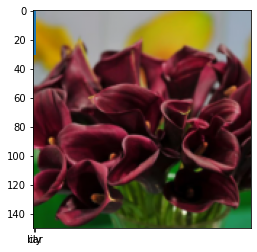

time: 1min 42s (started: 2021-06-18 14:55:28 +00:00)


In [3]:
!pip install ipython-autotime
%load_ext autotime

!pip install bing-image-downloader

!mkdir '/content/drive/MyDrive/images'

from bing_image_downloader import downloader
downloader.download("lily",limit=30,output_dir='/content/drive/MyDrive/images',adult_filter_off=True)


from bing_image_downloader import downloader
downloader.download("car",limit=30,output_dir='/content/drive/MyDrive/images'
,adult_filter_off=True)

# preprocessing
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target=[]
images=[]
flat_data=[]

DATADIR='/content/drive/MyDrive/images'
CATEGORIES=['lily','car']

for category in CATEGORIES:
    class_num=CATEGORIES.index(category)
    path=os.path.join(DATADIR,category)## create path to use all images
    for img in os.listdir(path):
       img_array=imread(os.path.join(path,img))
       plt.imshow(img_array)
       img_resized=resize(img_array,(150,150,3))
       flat_data.append(img_resized.flatten())
       images.append(img_resized)
       target.append(class_num)

flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)


flat_data[0]

target

unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

from skimage.color import rgb2gray

img_resize=resize(img_array,(100,100))
img_gray=rgb2gray(img_resize)
plt.imshow(img_gray,cmap='gray')
img_gray.size

import pandas as pd
df=pd.DataFrame(flat_data)
df['Target']=target
df

#split data into training and testing
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.5,random_state=109)

from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
param_grid = [
              {'C':[1,10,100,1000],'kernal':['linear']},
              {'C':[1,10,100,1000],'gamma':['auto'],'kernal':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
for kernel in ('linear', 'rbf', 'poly'):
   clf = svm.SVC(kernel=kernel, gamma= 'auto')
   #clf.fit(x_train, y_train)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)
y_pred

y_test

from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix



from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)


from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred # Predicted Value

model.score(x_test,y_test)

accuracy_score(y_pred,y_test)

confusion_matrix(y_pred,y_test)

flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')